In [1]:
!pip install qiskit

In [0]:
from qiskit import BasicAer
from qiskit import QuantumRegister ,ClassicalRegister, QuantumCircuit
from qiskit import execute
from qiskit.tools.visualization import plot_histogram ,circuit_drawer

In [0]:
q = QuantumRegister(2)
c = ClassicalRegister(2)

qc=QuantumCircuit(q,c)

In [11]:
#apply hadamard transform to both qubits
qc.h(q[0])
qc.h(q[1])

#apply oracle

qc.cz(q[0],q[1])

#apply diffusion transform

qc.h(q[0])
qc.h(q[1])

qc.x(q[0])
qc.x(q[1])

qc.cz(q[0],q[1])

qc.x(q[0])
qc.x(q[1])

qc.h(q[0])
qc.h(q[1])

qc.barrier(q)

qc.measure(q,c)

/usr/local/lib/python3.6/dist-packages/qiskit/tools/visualization/_circuit_visualization.py:206: DeprecationWarning: The current behavior for the default output will change in a future release. Instead of trying latex and falling back to mpl on failure it will just use "text" by default
  '"text" by default', DeprecationWarning)


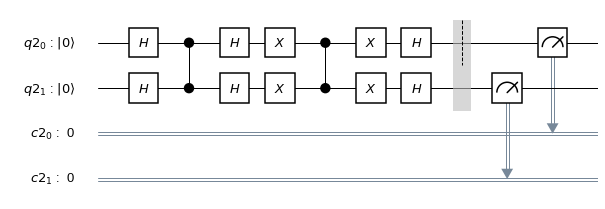

In [14]:
circuit_drawer(qc)

In [0]:
job=execute(qc,backend=BasicAer.get_backend('qasm_simulator'),shots=8192)

In [17]:
res=job.result()
counts=res.get_counts()

/usr/local/lib/python3.6/dist-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


{'11': 8192}


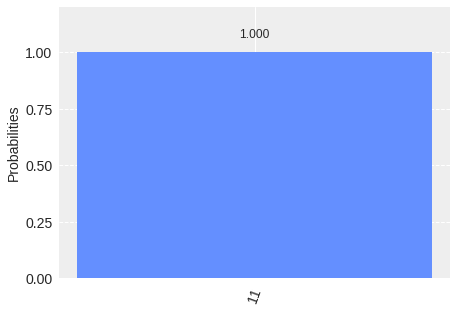

In [19]:
print(counts)
plot_histogram(counts)